## **서울 공유 자전거 분석**
**데이터 출처**: https://www.kaggle.com/datasets/joebeachcapital/seoul-bike-sharing?resource=download&select=SeoulBikeData.csv


**날짜별 한시간 단위로 공유 자전거를 대여한 수와 날씨 정보 데이터**

**Attribute Information**

**데이터 출처 설명**

Date (날짜) - year-month-day (연·월·일 형식의 날짜 변수)

Rented Bike count (대여 자전거 수) - Count of bikes rented at each hour (시간당 대여된 자전거 수)

Hour (시간) - Hour of the day (하루 중 시간)

Temperature (기온) - Temperature in Celsius(℃) (섭씨 온도, ℃)

Humidity (습도) - % (상대 습도, %)

Windspeed (풍속) - m/s (초속, m/s)

Visibility (가시거리) - 10m (가시거리, 10m 단위)

Dew point temperature (이슬점 온도) - Celsius(℃) (섭씨 온도, ℃)

Solar radiation (태양 복사량) - MJ/m2 (태양 복사량, MJ/m²)

Rainfall (강수량) - mm (강수량, mm)

Snowfall (적설량) - cm (적설량, cm)

Seasons (계절) - Winter, Spring, Summer, Autumn (겨울, 봄, 여름, 가을)

Holiday (휴일 여부) - Holiday/No holiday (휴일/비휴일)

Functional Day (운영 여부) - NoFunc(Non Functional Hours), Fun(Functional hours) (비운영 시간/운영 시간)

**분석 목적**

시간대별, 계절별 공유 자전거 이용 패턴 분석
: 하루 중 어떤 시간대, 요일, 계절에 대여량이 많은지 파악.

날씨 요인이 대여량에 미치는 영향 분석
: 기온, 습도, 강수량, 눈, 태양 복사량 등이 대여량에 미치는 영향 탐색.

**데이터 불러오기**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path0 = '/content/drive/MyDrive/에폭/SeoulBikeData.csv'

df = pd.read_csv(path0, encoding='cp949')
df.head()

,Date,Rented Bike Count,Hour,Temperature(캜),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(캜),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


**기초 통계 확인**

In [4]:
df.shape

(8760, 14)

row: 8760, column: 14개

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date                      8760 non-null   object 
 1   Rented Bike Count         8760 non-null   int64  
 2   Hour                      8760 non-null   int64  
 3   Temperature(캜)            8760 non-null   float64
 4   Humidity(%)               8760 non-null   int64  
 5   Wind speed (m/s)          8760 non-null   float64
 6   Visibility (10m)          8760 non-null   int64  
 7   Dew point temperature(캜)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)   8760 non-null   float64
 9   Rainfall(mm)              8760 non-null   float64
 10  Snowfall (cm)             8760 non-null   float64
 11  Seasons                   8760 non-null   object 
 12  Holiday                   8760 non-null   object 
 13  Functioning Day           8760 non-null   object 
dtypes: float

연속형 변수 10개, 범주형 변수 4개

In [14]:
# 결측치 개수 확인
df.isnull().sum() #결측치 없음!

,0
Date,0
Rented Bike Count,0
Hour,0
Temperature(캜),0
Humidity(%),0
Wind speed (m/s),0
Visibility (10m),0
Dew point temperature(캜),0
Solar Radiation (MJ/m2),0
Rainfall(mm),0


결측치 없음

### 연속형 변수 알아보기

/tmp/ipython-input-3868239499.py:5: UserWarning: Glyph 52892 (\N{HANGUL SYLLABLE KAELS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52892 (\N{HANGUL SYLLABLE KAELS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


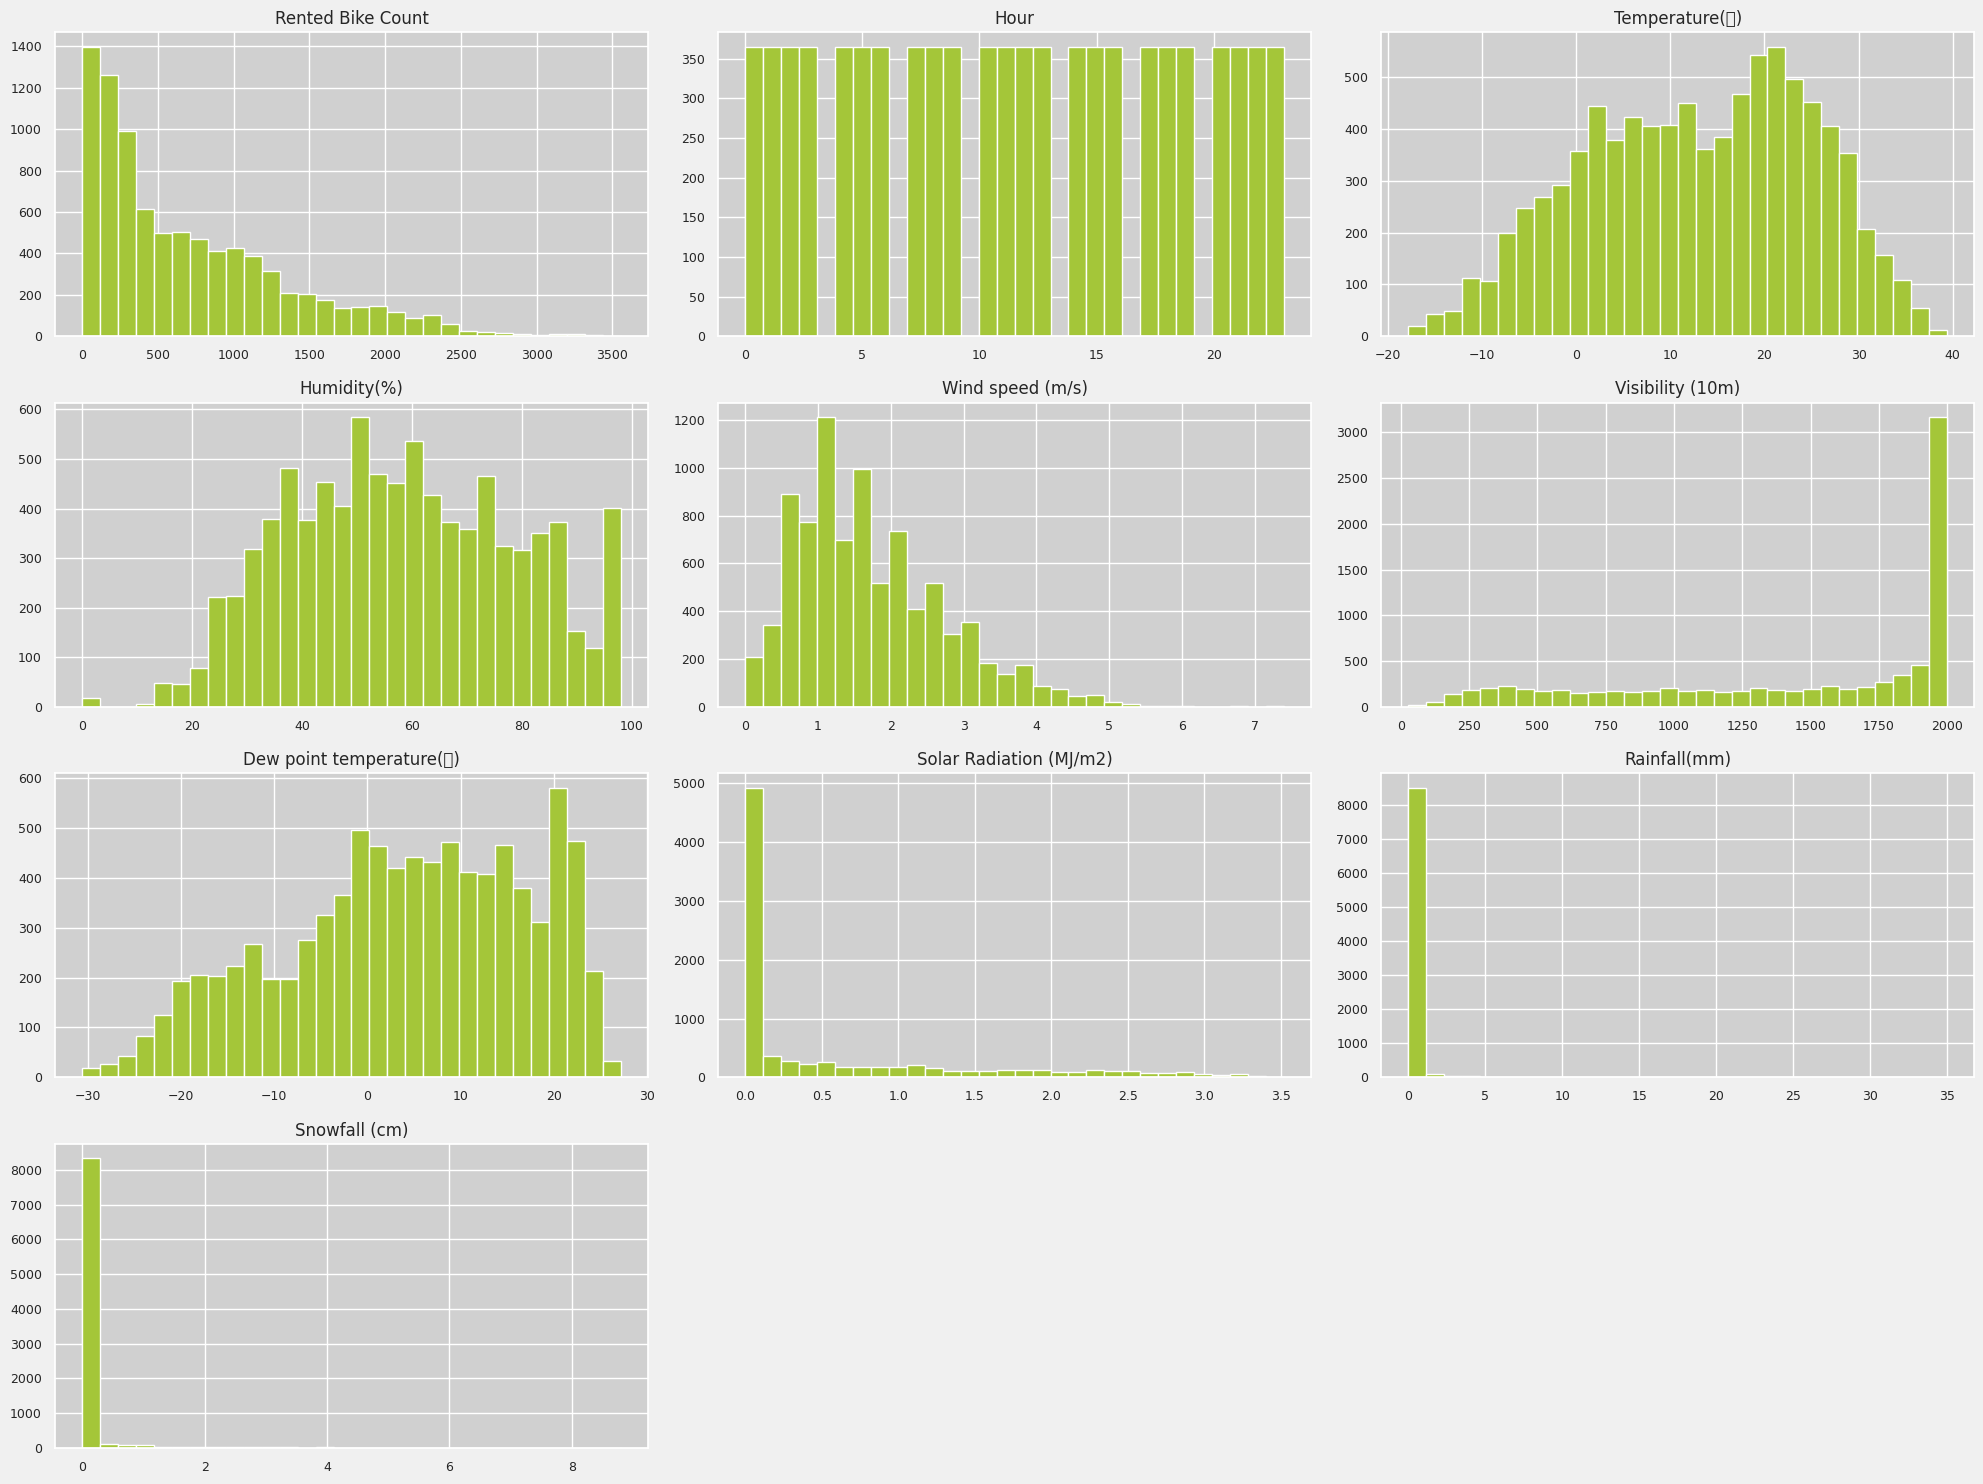

In [22]:
numerical_cols = df[df.columns[(df.dtypes == 'float64') | (df.dtypes == 'int64')]]
sns.set_style('whitegrid')
sns.set(rc={"axes.facecolor":"#D0D0D0","figure.facecolor":"#F0F0F0"})
numerical_cols.hist(figsize=(20,15), bins=30, xlabelsize=9, ylabelsize=9,color="#A4C639")
plt.tight_layout()
plt.show()

한쪽으로 치우친 변수 많음

In [7]:
numerical_cols.describe()

,Rented Bike Count,Hour,Temperature(캜),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(캜),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


Rainfall, Snowfall변수에 이상값 존재

### 범주형 변수 알아보기

In [8]:
categorical_cols=df[df.columns[df.dtypes==object]]
categorical_cols.describe()

,Date,Seasons,Holiday,Functioning Day
count,8760,8760,8760,8760
unique,365,4,2,2
top,30/11/2018,Spring,No Holiday,Yes
freq,24,2208,8328,8465


**Holiday 기준 알아보기**

In [10]:
H=df[df['Holiday'] == "Holiday"]
H

,Date,Rented Bike Count,Hour,Temperature(캜),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(캜),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
504,22/12/2017,196,0,-1.7,79,0.5,794,-4.8,0.0,0.0,0.8,Winter,Holiday,Yes
505,22/12/2017,250,1,-1.6,79,0.6,784,-4.7,0.0,0.0,0.8,Winter,Holiday,Yes
506,22/12/2017,161,2,-1.1,79,0.7,736,-4.2,0.0,0.0,0.8,Winter,Holiday,Yes
507,22/12/2017,99,3,-0.6,76,0.5,789,-4.3,0.0,0.0,0.7,Winter,Holiday,Yes
508,22/12/2017,64,4,-0.3,76,0.9,760,-4.0,0.0,0.0,0.7,Winter,Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7507,09/10/2018,0,19,17.3,47,2.2,2000,5.8,0.0,0.0,0.0,Autumn,Holiday,No
7508,09/10/2018,0,20,17.0,49,1.4,2000,6.1,0.0,0.0,0.0,Autumn,Holiday,No
7509,09/10/2018,0,21,16.8,52,1.6,2000,6.8,0.0,0.0,0.0,Autumn,Holiday,No
7510,09/10/2018,0,22,16.7,55,1.9,2000,7.6,0.0,0.0,0.0,Autumn,Holiday,No


In [11]:
H_date = H.groupby('Date').size().reset_index(name='count')
print(H_date)

          Date  count
0   01/01/2018     24
1   01/03/2018     24
2   01/05/2018     24
3   03/10/2018     24
4   06/06/2018     24
5   09/10/2018     24
6   15/02/2018     24
7   15/08/2018     24
8   16/02/2018     24
9   17/02/2018     24
10  22/05/2018     24
11  22/12/2017     24
12  23/09/2018     24
13  24/09/2018     24
14  24/12/2017     24
15  25/09/2018     24
16  25/12/2017     24
17  31/12/2017     24


공휴일만 Holiday로 지정(주말 제외)

**Functioning Day 변수 기준 알아보기**

Functioning Day변수는 Yes/No 두가지의 값만을 가지는데 Yes 수가 압도적으로 많음


In [12]:
NFD=df[df['Functioning Day'] == "No"]
NFD

,Date,Rented Bike Count,Hour,Temperature(캜),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(캜),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
3144,11/04/2018,0,0,14.4,82,4.6,1041,11.3,0.0,0.0,0.0,Spring,No Holiday,No
3145,11/04/2018,0,1,13.6,81,3.6,886,10.3,0.0,0.0,0.0,Spring,No Holiday,No
3146,11/04/2018,0,2,12.7,80,3.9,885,9.3,0.0,0.0,0.0,Spring,No Holiday,No
3147,11/04/2018,0,3,11.6,81,3.1,687,8.4,0.0,0.0,0.0,Spring,No Holiday,No
3148,11/04/2018,0,4,10.2,83,3.5,554,7.4,0.0,0.0,0.0,Spring,No Holiday,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8251,09/11/2018,0,19,11.9,71,2.7,589,6.7,0.0,0.0,0.0,Autumn,No Holiday,No
8252,09/11/2018,0,20,11.9,72,2.5,526,7.0,0.0,0.0,0.0,Autumn,No Holiday,No
8253,09/11/2018,0,21,11.4,74,1.9,498,6.9,0.0,0.0,0.0,Autumn,No Holiday,No
8254,09/11/2018,0,22,11.2,75,1.7,478,6.9,0.0,0.0,0.0,Autumn,No Holiday,No


In [13]:
count_per_date = NFD.groupby('Date').size().reset_index(name='count')
print(count_per_date)

          Date  count
0   02/10/2018     24
1   03/11/2018     24
2   04/10/2018     24
3   06/10/2018      7
4   06/11/2018     24
5   09/10/2018     24
6   09/11/2018     24
7   10/05/2018     24
8   11/04/2018     24
9   18/09/2018     24
10  19/09/2018     24
11  28/09/2018     24
12  30/09/2018     24


시스템 점검, 오류 등으로 추측 가능

### 이상치 확인하기

/tmp/ipython-input-1581164313.py:13: UserWarning: Glyph 52892 (\N{HANGUL SYLLABLE KAELS}) missing from font(s) DejaVu Sans.
  plt.tight_layout() #자동 간격 조정
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52892 (\N{HANGUL SYLLABLE KAELS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


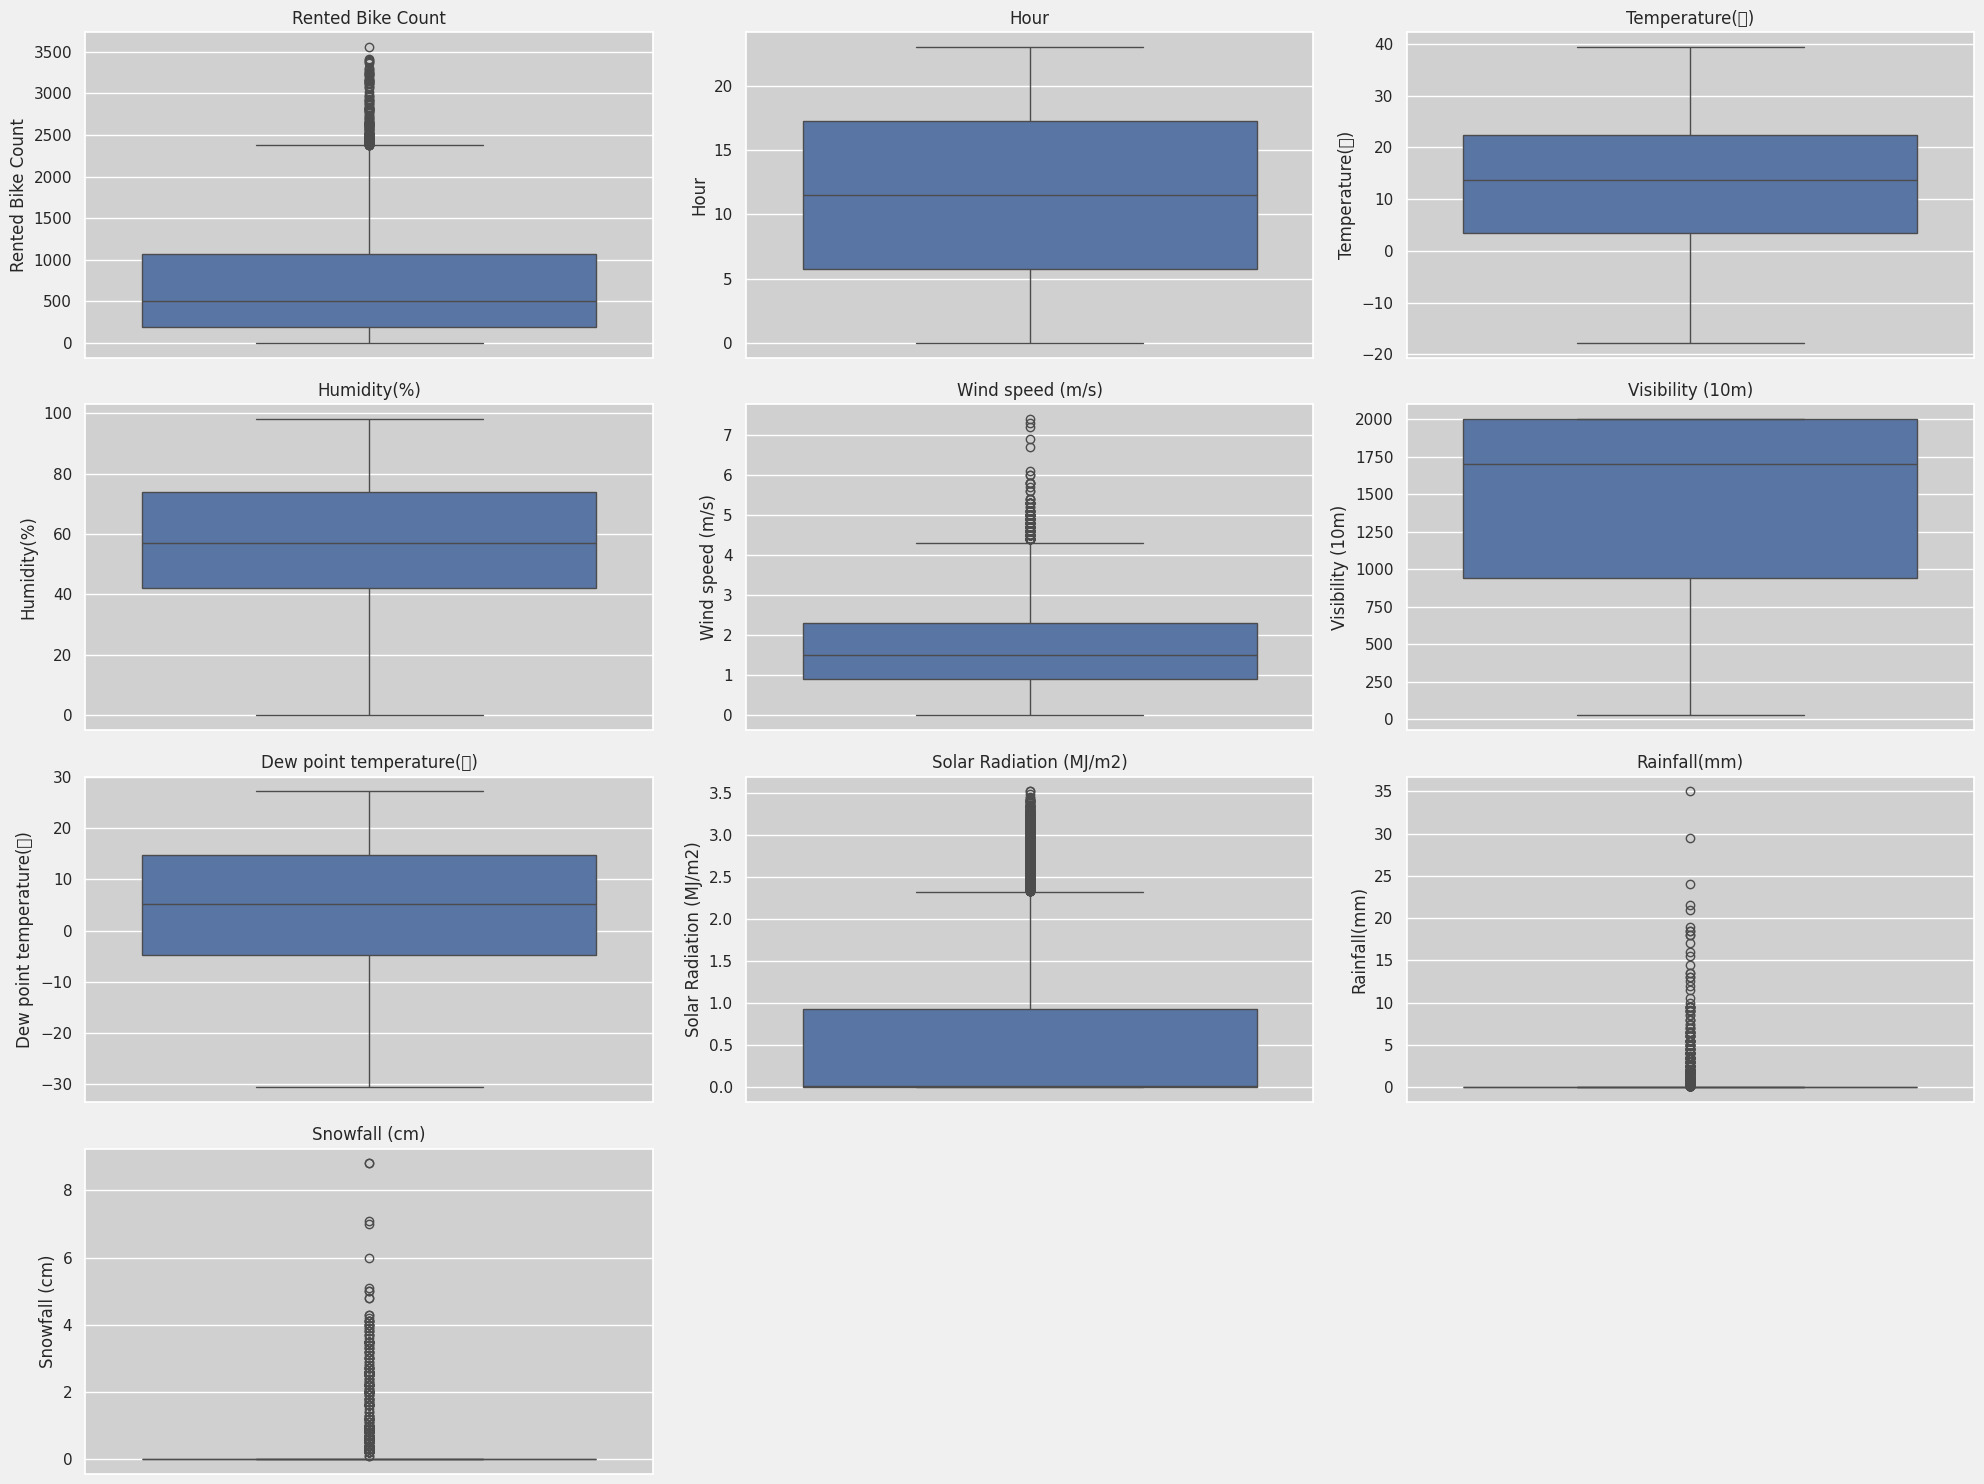

In [36]:
cols = numerical_cols.columns
n_cols = 3 #한 행에 3개

n_rows = len(cols) // n_cols + (1 if len(cols) % n_cols != 0 else 0) #행 수 계산

plt.figure(figsize=(20,15))

for i, col in enumerate(cols):
    plt.subplot(n_rows, n_cols, i+1)
    sns.boxplot(y=numerical_cols[col])
    plt.title(col)

plt.tight_layout() #자동 간격 조정
plt.show()

**이상치 비율 확인**

In [38]:
outlier_ratio = {}

for col in numerical_cols.columns:
    Q1 = numerical_cols[col].quantile(0.25)
    Q3 = numerical_cols[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outliers = numerical_cols[(numerical_cols[col] < lower) | (numerical_cols[col] > upper)]
    outlier_ratio[col] = len(outliers) / len(numerical_cols)

for col, ratio in outlier_ratio.items():
    print(f"{col}: {ratio:.2%} 이상치") #소수점 둘째자리까지 표시

Rented Bike Count: 1.80% 이상치
Hour: 0.00% 이상치
Temperature(캜): 0.00% 이상치
Humidity(%): 0.00% 이상치
Wind speed (m/s): 1.84% 이상치
Visibility (10m): 0.00% 이상치
Dew point temperature(캜): 0.00% 이상치
Solar Radiation (MJ/m2): 7.32% 이상치
Rainfall(mm): 6.03% 이상치
Snowfall (cm): 5.06% 이상치


이상치는 주로 날씨 관련 변수(Solar Radiation, Rainfall, Snowfall, Wind speed)에서 나타남. 우리나라는 사계절이 뚜렷하여 계절이 전형적으로 나타나는 시기(?)에 특징적인 날씨가 발생하며, 장마, 폭설, 강풍, 한여름 맑은 날 등 극단적인 날씨로 인한 이상치 발생.

**상관관계 확인하기**

/usr/local/lib/python3.12/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 52892 (\N{HANGUL SYLLABLE KAELS}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52892 (\N{HANGUL SYLLABLE KAELS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


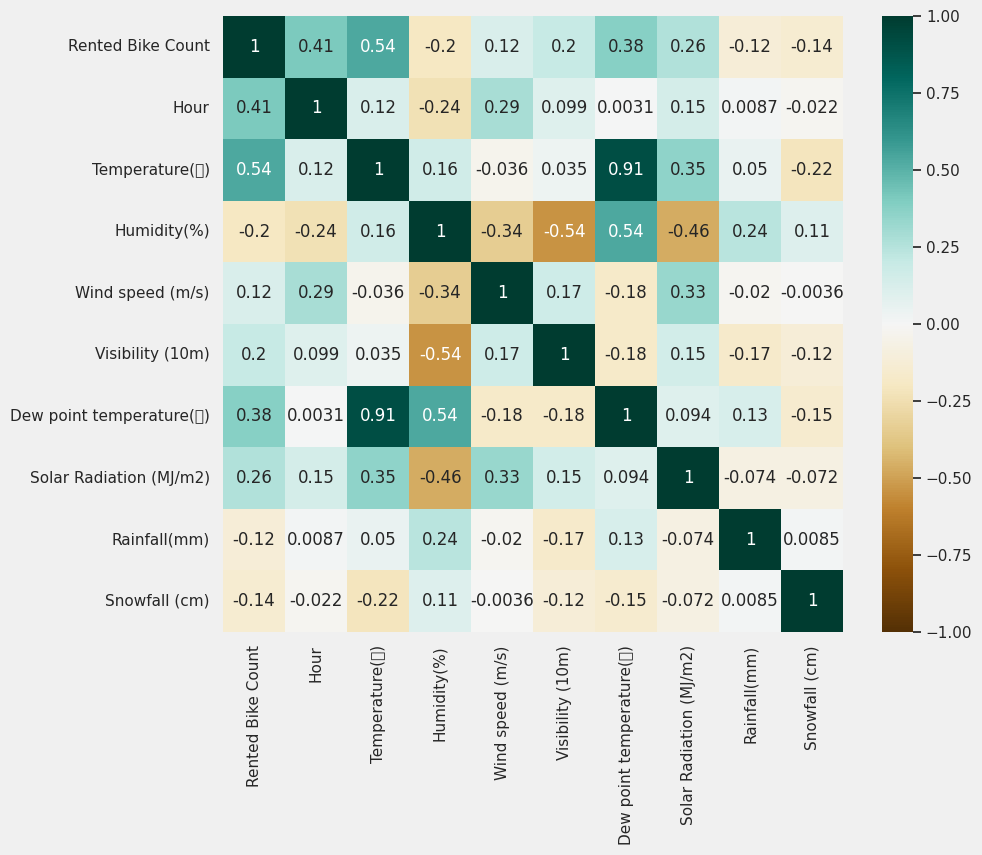

In [48]:
plt.figure(figsize=(10,8))
sns.heatmap(
    df.corr(numeric_only=True),
    cmap="BrBG",
    vmin=-1,
    vmax=1,
    annot=True
)
plt.show()

Temperature, Dew point temperature -> 0.91 매우 높은 상관관계. 상관관계가 높을 수 밖에 없는 변수.

다중공선성 문제. but Humidity는 Dew point temperature와 상관관계가 있다(0.54)고 볼 수 있고, temperature은 관계가 없다(0.16)고 볼 수 있음.

온도와 이슬점은 강하게 상관되지만, 이슬점은 습도와도 관련이 있어 제거하지 않고 유지하는 것이 합리적.


Rented Bike Count, Temperature -> 0.54 기온이 높을수록 대여 자전거 수 많음.

Visibility, Humidity -> -0.54

Solar Radiation, Humidity -> -0.46


